In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import dabest
import osar

#NOTE: SUPPRESSES WARNINGS!

import warnings

warnings.simplefilter(action="ignore", category=RuntimeWarning)
#warnings.simplefilter(action="default", category=RuntimeWarning)

Pre-compiling numba functions for DABEST...


Compiling numba functions: 100%|██████████| 11/11 [00:00<00:00, 23.16it/s]

Numba compilation complete!


In [5]:
print(osar.__version__)

0.23.9


In [3]:
basegenotype = "SS95118"
responder = "Chrimson2"
addNotes = basegenotype + " x " + responder
#VT999036: Epoch 1
#
##CHECK DRIVE LETTER
#filedirectory = "C:\\Users\\Star\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\ACR\\"
filedirectory = "C:\\Users\\Star\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\OSAR\\"

baseDirectory = filedirectory + addNotes

#### sets up filename for later - make sure this is correct

if len(addNotes) > 0:
    addNotes = "_" + addNotes   
#filename = baseDirectory + "/" + str(baseDirectory).split("/", -1)[-1][7:] 
filename = baseDirectory + "\\" + basegenotype
filename_AppendDT = "_gen " + dt.datetime.today().strftime('%Y-%m-%d')

##### use this if you need to set filename manually
#filename = baseDirectory + "/" + "201230 R58E02-LexA;VT999036-Gal4 x Dop2R-RNAi;LexAOP-Chrimson_Female"

filename = filename + addNotes + filename_AppendDT

filename

'C:\\Users\\Star\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\OSAR\\SS95118 x Chrimson2\\SS95118_SS95118 x Chrimson2_gen 2024-12-27'

In [4]:
#check for border shift
osarAnalysis = osar.osar(baseDirectory,
                        # border_shift_mm = 1.5,  
                        # countlog_folder = "countlog_Full Only",         
                        # countlog_folder = "countlog_Half and Full",
                         driver = basegenotype)

Creating borders for each fly...
Done.

Processing CSV 40 of 40
Summarising results for all flies...
All done.


In [5]:
#color palette organizing

if responder == "Chrimson2":
    sibling_pi_color = "#c29999"
    pi_colors = "#cf0c16"

    sibling_sr_color = "#a8806f"
    sr_color = "#e0581d"
    
    
if responder == "ACR":
    sibling_pi_color = "#87ab89"
    pi_colors = "#0da315"

    sibling_sr_color = "#759c8c"
    sr_color = "#0fab6d"

my_color_palette_pi = {"Eighth; Sibling" : sibling_pi_color,
                      "Eighth; Offspring"    : pi_colors,
                    "Quarter; Sibling" : sibling_pi_color,
                      "Quarter; Offspring"    : pi_colors, 
                     "Half; Sibling" : sibling_pi_color,
                      "Half; Offspring"    : pi_colors,
                     "Full; Sibling" : sibling_pi_color,
                      "Full; Offspring"    : pi_colors
                     }


my_color_palette_sr = {"Eighth; Sibling" : sibling_sr_color,
                      "Eighth; Offspring"    : sr_color,
                    "Quarter; Sibling" : sibling_sr_color,
                      "Quarter; Offspring"    : sr_color, 
                     "Half; Sibling" : sibling_sr_color,
                      "Half; Offspring"    : sr_color,
                     "Full; Sibling" : sibling_sr_color,
                      "Full; Offspring"    : sr_color
                     }


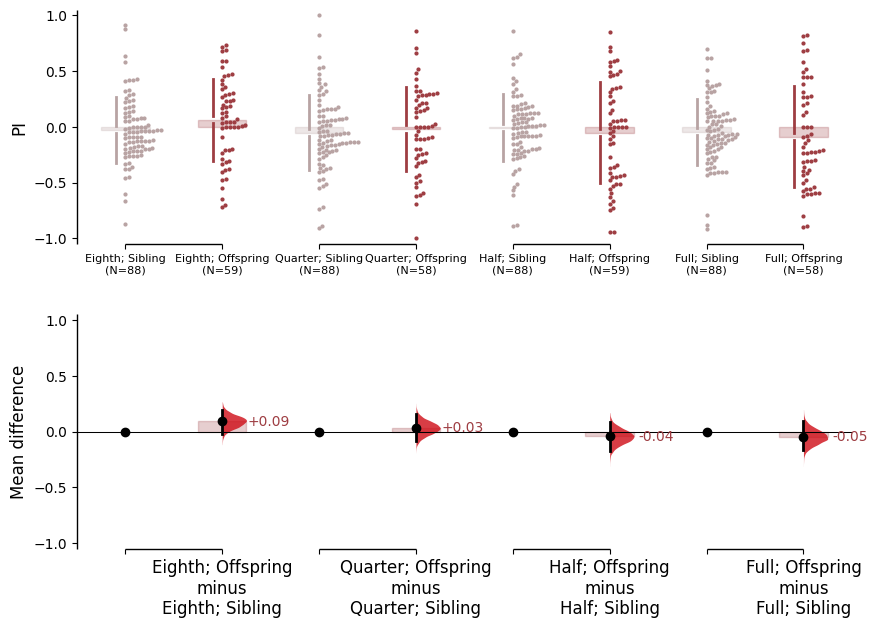

In [6]:
# fulight = osarAnalysis.results[osarAnalysis.results['light_intensity'] == "Full"]
# fulight = fulight['pi_smoothed_Pattern 01']

newOA = osarAnalysis.contrasts.pi.time_spent_in_light(epoch='first')
osarFig_PI_Meandiff = newOA.mean_diff.plot(
                               swarm_ylim=(-1.05,1.05), 
                               contrast_ylim=(-1.05,1.05), custom_palette= my_color_palette_pi,
                             
                               fig_size=(10,7), fontsize_rawylabel=12, fontsize_rawxlabel=8, 
        fontsize_contrastxlabel=12, fontsize_contrastylabel=12, es_marker_size=6, 
                               #fig_size=(10,7), 
                               swarm_label="PI",
                               raw_marker_size= 1)


In [ ]:
osarFig_PI_Meandiff.savefig(filename + '.png', bbox_inches="tight", dpi=300)

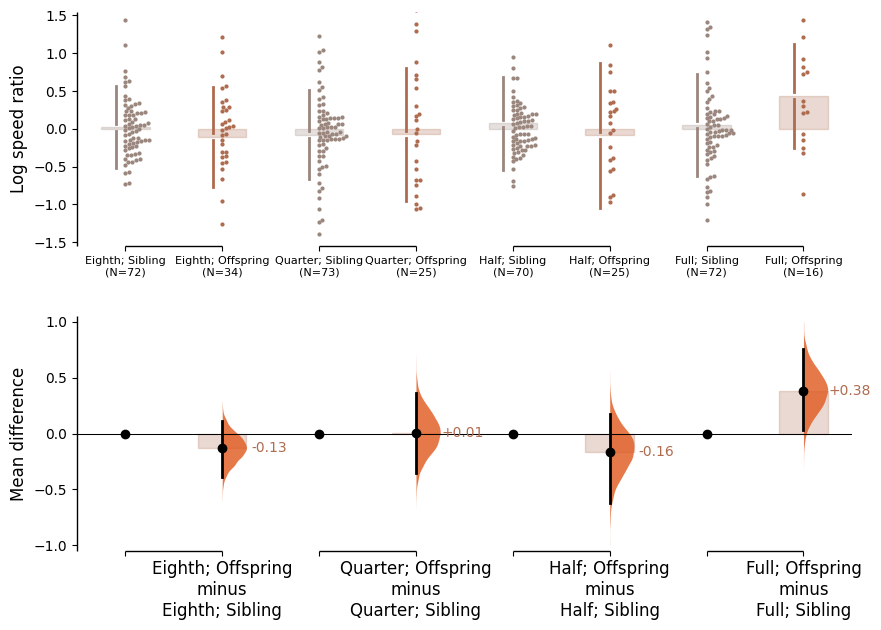

In [7]:
speedratio2 = osarAnalysis.contrasts.log2_speed_ratio.light_speed_against_dark_speed(epoch='first')

speedratio2.mean_diff.plot(custom_palette= my_color_palette_sr, fig_size=(10,7), fontsize_rawylabel=12, fontsize_rawxlabel=8, 
        fontsize_contrastxlabel=12, fontsize_contrastylabel=12, es_marker_size=6,  swarm_ylim=(-1.55,1.55), 
                               contrast_ylim=(-1.05,1.05),
                               #fig_size=(10,7), 
                               swarm_label="Log speed ratio",
                               raw_marker_size= 1
                          );

#, swarm_ylim = (-20, 10), contrast_ylim = (-1, 1)

# sns.set(font_scale=0.7, style='ticks')
# speedratio2.mean_diff

In [57]:
osarFig_PI_Meandiff.savefig(filename + '.png', bbox_inches="tight", dpi=300)

## obsolete code


In [ ]:
# df2 = osarAnalysis.results
# dfi=df2[(df2['light_intensity']=='Full')].copy()
# dfi.replace([np.inf, -np.inf], np.nan, inplace=True)
# dfi.rename(columns={'driver': 'MBON'}, inplace = True)

# parameter = 'pi_smoothed_Pattern 01'
# #parameter = 'log2_speed_ratio_Pattern 01'

# if parameter == 'log2_speed_ratio_Pattern 01':
#     yaxi = 'Log2 Speed Ratio'
# else:
#     yaxi = 'PI'
    
# dfr1 = pd.DataFrame()
# for names in basegenotype:
#     dfrr = pd.DataFrame()
#     filter1 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Offspring')].copy().reset_index(drop=True)
#     filter2 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Sibling')].copy().reset_index(drop=True)
    
#     dfrr[names + " Cntrl" ] = filter2[parameter]
#     dfrr[names] = filter1[parameter]
#     dfr1 = pd.concat([dfr1, dfrr], axis = 1)

In [ ]:
## obsolete code
# fulight = osarAnalysis.results[osarAnalysis.results['light_intensity'] == "Full"]
# fulight = fulight['pi_smoothed_Pattern 01']
# osarFig_PI_Meandiff = osarAnalysis.mean_diff.plot(color_col='genotype', 
#                                swarm_ylim=(-1.05,1.05),
#                                contrast_ylim=(-1.05,1.05),
#                              custom_palette= colors,
#                                fig_size=(7,5),
#                                #fig_size=(10,7),
#                                swarm_label="PI",
#                                raw_marker_size= 2 )
# sns.set(font_scale=0.5)
# osarAnalysis.mean_diff